# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [55]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, 0.000])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,0.0


In [57]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

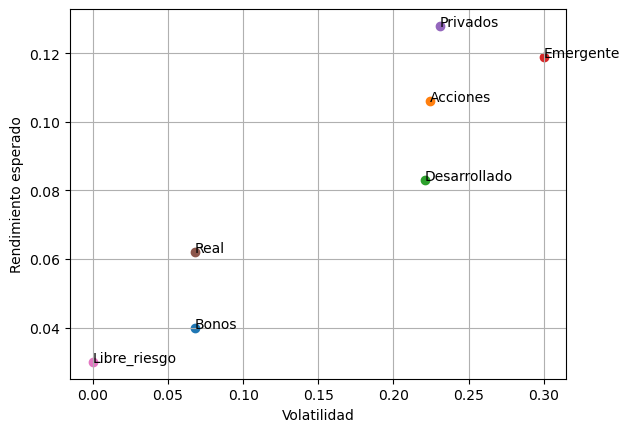

In [58]:
inversiones=annual_ret_summ.keys()
for i in inversiones:
    plt.scatter(annual_ret_summ[i]['Volatilidad'],annual_ret_summ[i]['Media'])
    plt.text(annual_ret_summ[i]['Volatilidad'],annual_ret_summ[i]['Media'],i)
    plt.xlabel("Volatilidad")
    plt.ylabel("Rendimiento esperado")
plt.grid()


## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio 
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio 


In [59]:
rf = annual_ret_summ.loc["Media", "Libre_riesgo"]
annual_ret_summ2 = annual_ret_summ.drop("Libre_riesgo", axis=1)

In [60]:
S=np.diag(annual_ret_summ2.loc['Volatilidad']).astype(float)
S

array([[0.068, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.224, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.221, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.3  , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.231, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.068]])

In [7]:
sigma=S.dot(corr).dot(S)
sigma

array([[0.004624 , 0.0060928, 0.003757 , 0.00408  , 0.0023562, 0.0009248],
       [0.0060928, 0.050176 , 0.0346528, 0.04032  , 0.0362208, 0.0030464],
       [0.003757 , 0.0346528, 0.048841 , 0.049725 , 0.0306306, 0.0015028],
       [0.00408  , 0.04032  , 0.049725 , 0.09     , 0.017325 , 0.00306  ],
       [0.0023562, 0.0362208, 0.0306306, 0.017325 , 0.053361 , 0.0047124],
       [0.0009248, 0.0030464, 0.0015028, 0.00306  , 0.0047124, 0.004624 ]])

In [61]:
e1= annual_ret_summ2['Bonos']['Media']
e2= annual_ret_summ2['Acciones']['Media']
e3= annual_ret_summ2['Desarrollado']['Media']
e4= annual_ret_summ2['Emergente']['Media']
e5= annual_ret_summ2['Privados']['Media']
e6= annual_ret_summ2['Real']['Media']

eind = np.array([e1, e2, e3, e4, e5, e6])

def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

# Restricciones, quiero un rendimiento iguial a mu_req 
def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

# Pesos tiene que sumar 1 
def weights_equal_1(w):
    return np.sum(w) - 1

N = 100
ereq = np.linspace(eind.min(), eind.max(), N)
portfolios= pd.DataFrame(index=range(N), columns=['w1','w2','w3','w4','w5', 'w6','media','vol'])

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolios.loc[i, ['w1','w2','w3','w4','w5', 'w6']] = min_var.x
    portfolios['media'][i] = eind.dot(min_var.x)
    portfolios['vol'][i] = np.sqrt(varianza(min_var.x, sigma))
    portfolios['sharpe'] = (portfolios["media"] - rf) / portfolios["vol"]
portfolios

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.04,0.068,0.147059
1,0.959596,0.0,0.0,0.0,0.0,0.040404,0.040889,0.065857,0.165341
2,0.919192,0.0,0.0,0.0,0.0,0.080808,0.041778,0.063832,0.184514
3,0.878788,0.0,0.0,0.0,0.0,0.121212,0.042667,0.061935,0.204516
4,0.838384,0.0,0.0,0.0,0.0,0.161616,0.043556,0.060179,0.225253
...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.278406,0.705686,0.015908,0.124444,0.201224,0.46935
96,0.0,0.0,0.0,0.282137,0.715933,0.001931,0.125333,0.203789,0.467803
97,0.0,0.0,0.0,0.197531,0.802469,0.0,0.126222,0.208246,0.462061
98,0.0,0.0,0.0,0.098765,0.901235,0.0,0.127111,0.217493,0.446502


In [62]:
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var = minimize(varianza, 
                    x0=np.array([1/6, 1/6, 1/6,1/6,1/6, 1/6]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1),(0,1),(0,1), (0,1)),
                    constraints=cons)

In [63]:
w_minvar = min_var.x
w_minvar

array([4.95146500e-01, 2.60208521e-18, 2.09838872e-04, 4.33680869e-19,
       0.00000000e+00, 5.04643661e-01])

In [64]:
e_minvar = eind.dot(w_minvar)
e_minvar

0.051111183609283295

In [65]:
s_minvar = np.sqrt(varianza(w_minvar, sigma))
s_minvar

0.05267355818628889

In [66]:
sharpe=(e_minvar-rf)/s_minvar
sharpe

0.4007928140077427

In [67]:
min_var = portfolios[portfolios.vol == portfolios.vol.min()]
min_var

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
13,0.480905,0.0,0.006451,0.0,0.0,0.512644,0.051556,0.052686,0.409129


In [68]:
e_emv = portfolios[portfolios.sharpe == portfolios.sharpe.max()]
e_emv

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
42,0.003191,0.0,0.0,0.080966,0.163461,0.752381,0.077333,0.081443,0.581186


## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [70]:
gama= np.linspace(1,10,10)

In [71]:
df = pd.DataFrame({
    'gama':gama,
    'w_acciones':(e_emv.media.iloc[0]-rf)/(gama*emv.vol.iloc[0]**2)
})
df['w_libre_riesgo']=1-df.w_acciones
df

,gama,w_acciones,w_libre_riesgo
0,1.0,7.136147,-6.136147
1,2.0,3.568073,-2.568073
2,3.0,2.378716,-1.378716
3,4.0,1.784037,-0.784037
4,5.0,1.427229,-0.427229
5,6.0,1.189358,-0.189358
6,7.0,1.019450,-0.019450
7,8.0,0.892018,0.107982
8,9.0,0.792905,0.207095
9,10.0,0.713615,0.286385


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

Text(0, 0.5, '$E[x]$')

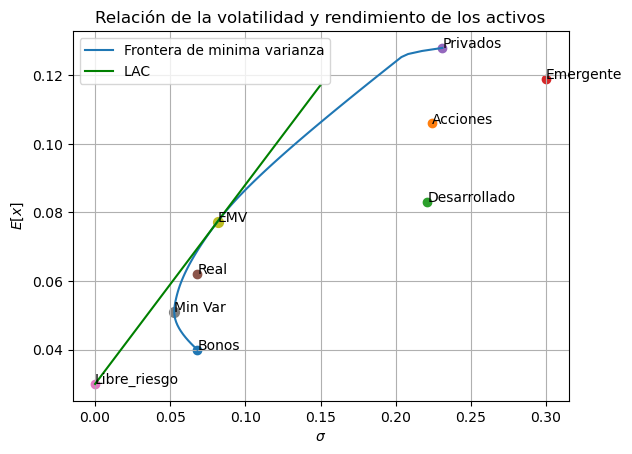

In [72]:
s = np.linspace(0,0.15,10)
lac= rf+s*e_emv.sharpe.iloc[0]
plt.figure()

for i in range(len(annual_ret_summ.T)):
    flag_paises = annual_ret_summ.T.iloc[i]
    name = annual_ret_summ.T.index[i]
    plt.scatter(flag_paises["Volatilidad"], flag_paises["Media"])
    plt.text(flag_paises["Volatilidad"], flag_paises["Media"], name)

plt.scatter(s_minvar, e_minvar, s=50)
plt.text(s_minvar, e_minvar, "Min Var")

plt.scatter(e_emv.vol, e_emv.media, s=50)
plt.text(e_emv.vol, e_emv.media, "EMV")

plt.plot(portfolios.vol, portfolios.media, label="Frontera de minima varianza")
plt.plot(s, lac , c="green", label='LAC')

plt.grid()
plt.legend()
plt.title("Relación de la volatilidad y rendimiento de los activos")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")
